___
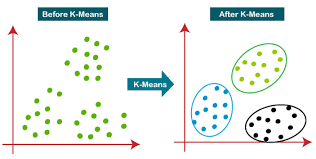


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Clustering</font>

### K-Means

Pasos

1. Seleccionar el número de grupos/clusters, "k" que queremos. 

2. Crear los "K" centroides. La manera más fácil es usar las primeras "K" filas del dataset o hacer una selección random. 

3. Estos centroides no están optimizados. El entrenamiento implica mover los centroides hasta que estén en el centro de cada grupo. En este punto podemos determinar en qué grupo debería estar un punto de datos dado (el centroide al que está más cercano).
Con nuestros centroides iniciales, iteramos a través de los datos agrupando cada punto hasta el centroide al que está más cercano. Luego, cambiamos los centroides tomando el promedio de todos los puntos de datos en cada grupo.

4. El proceso se repite hasta que los centroides ya no cambien tanto. 

#### Ejemplo 1

In [1]:
import numpy as np

#Crear datos
data = np.array([  
    [4, 3], [0, 0], [2, 4], [3, 4], [5, 4], [-2, 1], [-3, 0], [-3, -3], [8, 12], [11, 11], [9, 10]  
])
data

array([[ 4,  3],
       [ 0,  0],
       [ 2,  4],
       [ 3,  4],
       [ 5,  4],
       [-2,  1],
       [-3,  0],
       [-3, -3],
       [ 8, 12],
       [11, 11],
       [ 9, 10]])

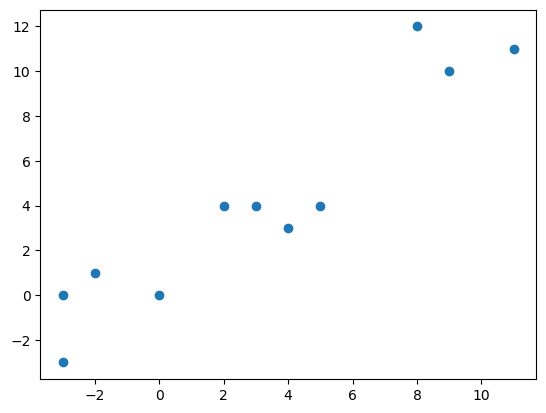

In [2]:
#Graficar datos
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.show()

In [3]:
#Inicializar kmeans
from sklearn.cluster import KMeans

#Inicializar objeto
kmeans = KMeans(
       init="random", #k-means++ #inicializar centroides aleatoriamente
       n_clusters=3,
       n_init=10, #cuantas veces se va a hacer el método de kmeans
       max_iter=300,
       random_state=42)

#Entrenar datos
kmeans.fit(data)

C:\Users\Saruki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [4]:
#Predecir a qué grupo pertenece cada dato
y_means = kmeans.fit_predict(data)
y_means

C:\Users\Saruki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2])

In [5]:
#observar centroides de cada grupo
kmeans.cluster_centers_

array([[-2.        , -0.5       ],
       [ 3.5       ,  3.75      ],
       [ 9.33333333, 11.        ]])

C:\Users\Saruki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saruki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saruki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saruki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

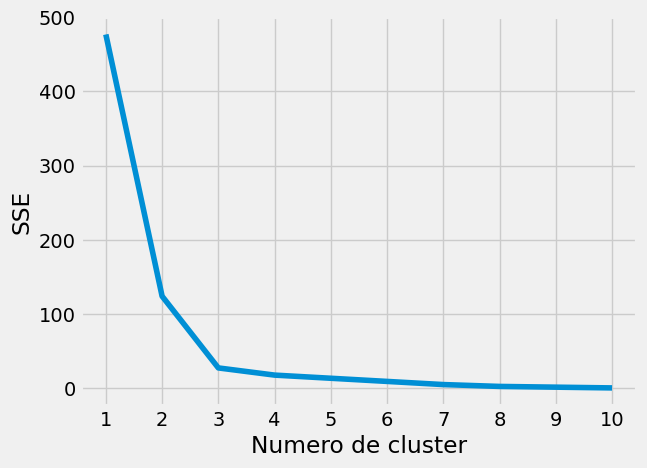

In [6]:
#y si no sabemos cuantos clusters usar?
#Elegir número de clusters (k)
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
}

#Calculamos la suma del error cuadrático (SSE) para cada "k" de clusters
sse=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
    
#Graficamos
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero de cluster")
plt.ylabel("SSE")
plt.show()

In [7]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [8]:
# o de forma más automatizada usando librería
from kneed import KneeLocator
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

#### Ejemplo 2 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show() 

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

In [ ]:
data[0:3]

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
import matplotlib.pyplot as plt

#Reducir la dimensionalidad del dataset
reduced_data = PCA(n_components=2).fit_transform(data) #Aplicamos PCA y reducimos a dos dimensiones

#Aplicar el kmeans a los datos reducidos
kmeans = KMeans(n_clusters=10, n_init=4)
#entrenamos el modelo
kmeans.fit(reduced_data)

#Calcular los centroides
centroids = kmeans.cluster_centers_

#Predecir a dónde pertenece cada dato
label = kmeans.fit_predict(reduced_data)
unique_labels = np.unique(label)




In [ ]:
# Graficar
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
             color='k',zorder=10)
plt.legend()
plt.show()

In [ ]:
#Etiquetas de los datos
kmeans.labels_

### Recomendaciones

- Normalización: poner los atributos en escalas similares
- Selección de características/reducción de dimensionalidad: es buena idea usar el menor número atributos posible debido a los que se conoce como la maldición de la dimensionalidad. A que a medida que el número de dimensiones (atributos) aumenta, la distancia discrimina cada vez menos.

#### Alguna bibliografía

Evaluación del modelo
- https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Una guía práctica de clustering:
- https://realpython.com/k-means-clustering-python/


